In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
# Loading Iris data
iris=pd.read_csv("F:\Iris-Dataset.csv")
print(iris)

      Id  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0      1           5.1          3.5           1.4          0.2     setosa
1      2           4.9          3.0           1.4          0.2     setosa
2      3           4.7          3.2           1.3          0.2     setosa
3      4           4.6          3.1           1.5          0.2     setosa
4      5           5.0          3.6           1.4          0.2     setosa
..   ...           ...          ...           ...          ...        ...
145  146           6.7          3.0           5.2          2.3  virginica
146  147           6.3          2.5           5.0          1.9  virginica
147  148           6.5          3.0           5.2          2.0  virginica
148  149           6.2          3.4           5.4          2.3  virginica
149  150           5.9          3.0           5.1          1.8  virginica

[150 rows x 6 columns]


In [4]:
print(iris.shape)

(150, 6)


In [5]:
print(iris.describe())

               Id  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.054000      3.758667     1.198667
std     43.445368      0.828066     0.433594      1.764420     0.763161
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


In [6]:
#Checking for null values
print(iris.isna().sum())
print(iris.describe())

Id              0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64
               Id  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.054000      3.758667     1.198667
std     43.445368      0.828066     0.433594      1.764420     0.763161
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


In [7]:
iris.head()

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.head(15)

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [9]:
iris.tail(15)

,Id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
135,136,7.7,3.0,6.1,2.3,virginica
136,137,6.3,3.4,5.6,2.4,virginica
137,138,6.4,3.1,5.5,1.8,virginica
138,139,6.0,3.0,4.8,1.8,virginica
139,140,6.9,3.1,5.4,2.1,virginica
140,141,6.7,3.1,5.6,2.4,virginica
141,142,6.9,3.1,5.1,2.3,virginica
142,143,5.8,2.7,5.1,1.9,virginica
143,144,6.8,3.2,5.9,2.3,virginica
144,145,6.7,3.3,5.7,2.5,virginica


In [10]:
n = len(iris[iris['Species'] == 'versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [11]:
n1 = len(iris[iris['Species'] == 'virginica'])
print("No of Virginica in Dataset:",n1)

No of Virginica in Dataset: 50


In [12]:
n2 = len(iris[iris['Species'] == 'setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 50


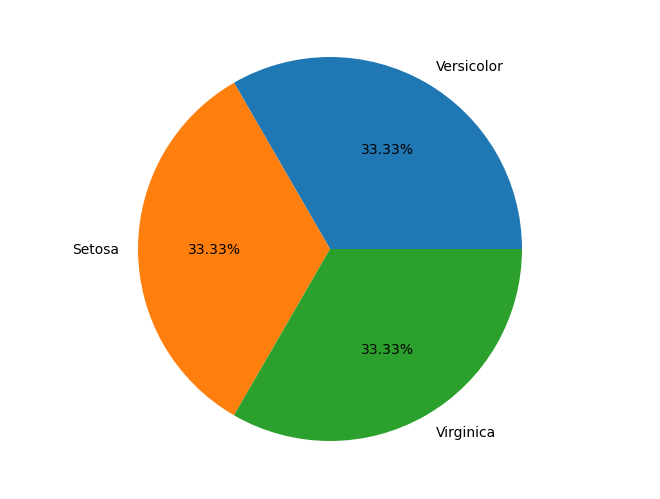

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()


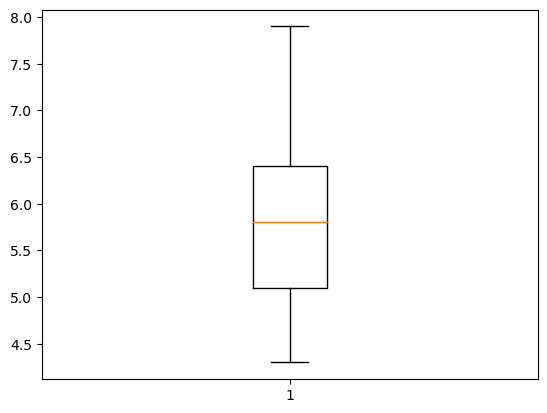

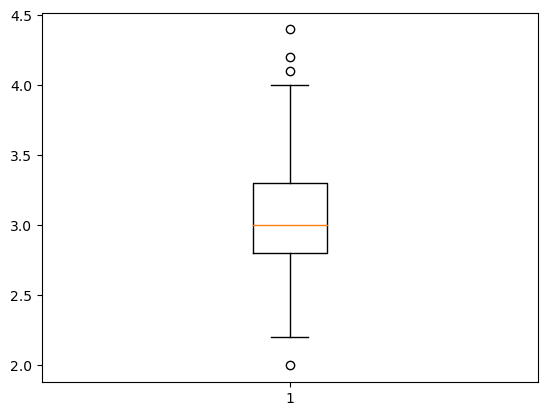

In [14]:
#Checking for outliars of Sepal length and Width
plt.figure(1)
plt.boxplot([iris['Sepal.Length']])
plt.figure(2)
plt.boxplot([iris['Sepal.Width']])
plt.show()

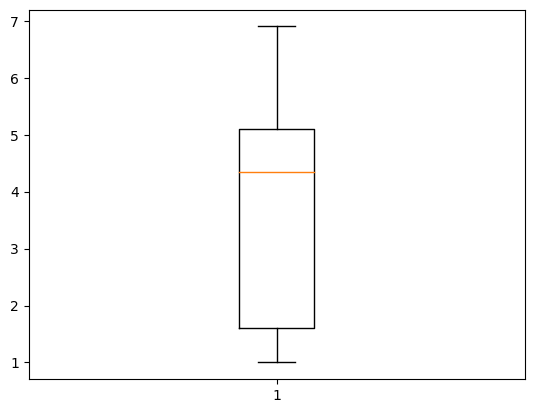

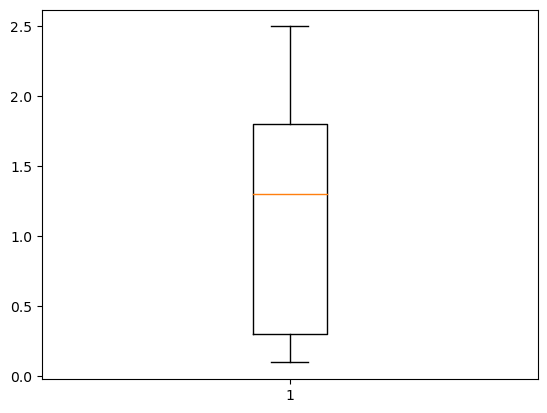

In [15]:
#Checking for outliars of Petal length and Width
plt.figure(3)
plt.boxplot([iris['Petal.Length']])
plt.figure(4)
plt.boxplot([iris['Petal.Width']])
plt.show()

Id                 Axes(0.125,0.53;0.133621x0.35)
Sepal.Length    Axes(0.285345,0.53;0.133621x0.35)
Sepal.Width      Axes(0.44569,0.53;0.133621x0.35)
Petal.Length    Axes(0.606034,0.53;0.133621x0.35)
Petal.Width     Axes(0.766379,0.53;0.133621x0.35)
dtype: object

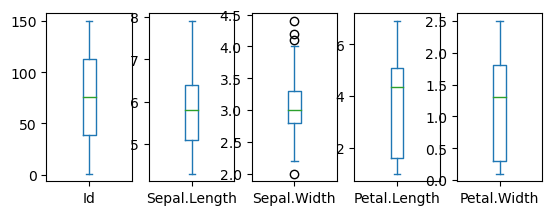

In [16]:
iris.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

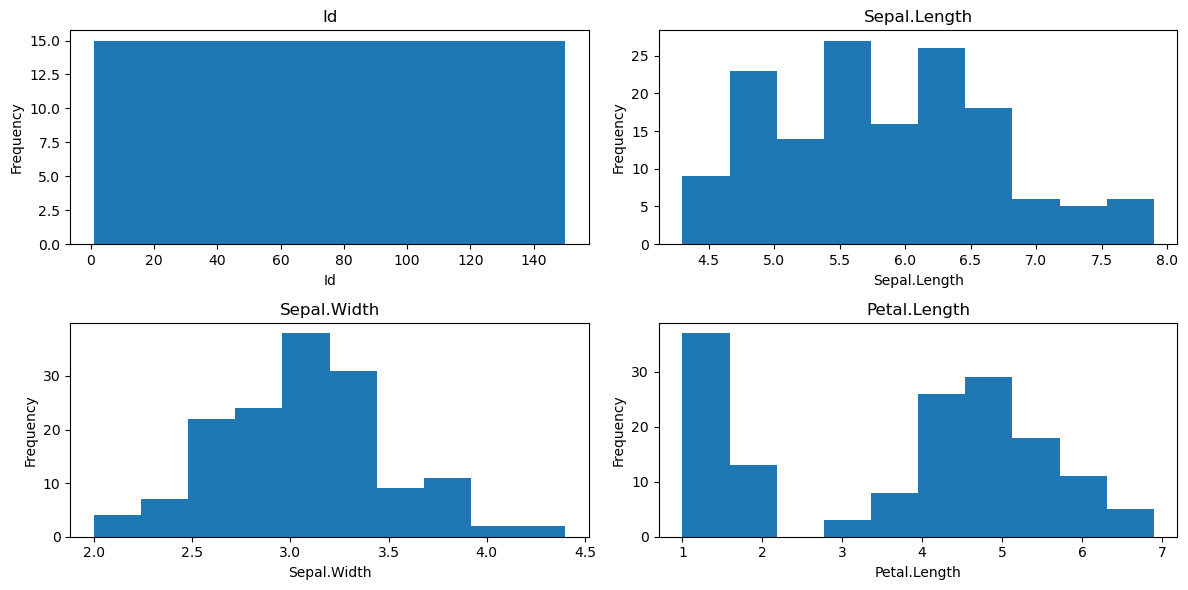

In [17]:
# Plot a histogram for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

for i, feature in enumerate(iris.columns[:4]):
    ax = axes[i // 2, i % 2]
    ax.hist(iris[feature])
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Tighten the layout and show the plot
plt.tight_layout()
plt.show()

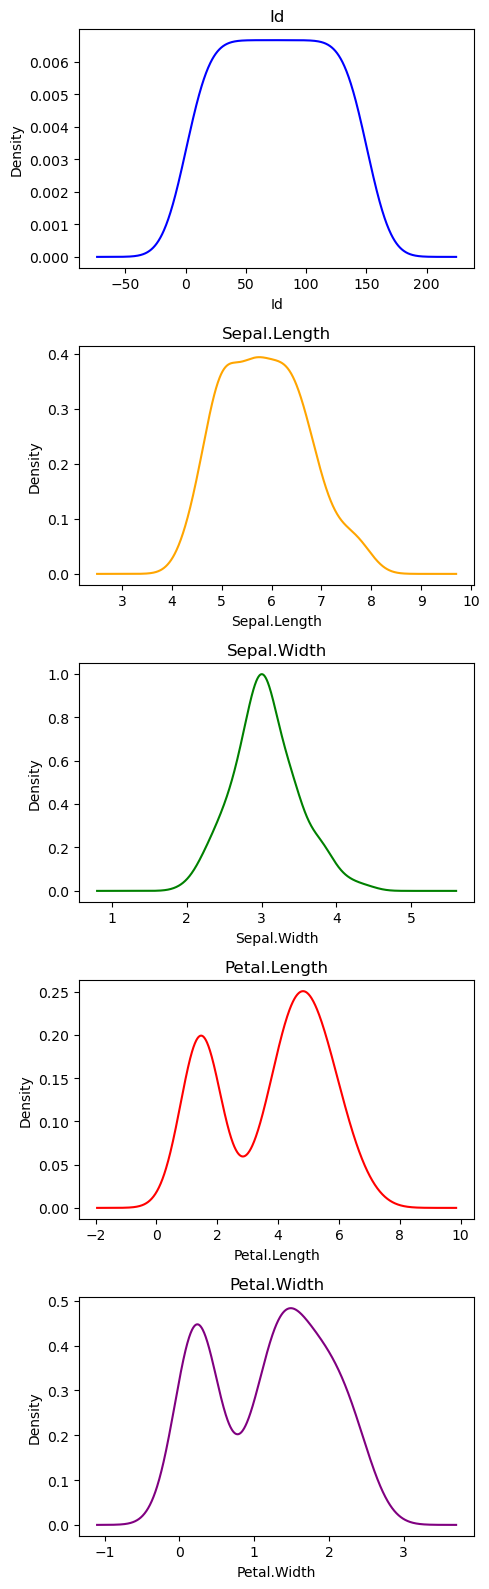

In [18]:
# Plot the density plot for each feature in a different color
fig, axes = plt.subplots(5, 1, figsize=(5, 16))

colors = ['blue', 'orange', 'green', 'red', 'purple']
for i, feature in enumerate(iris.columns[:5]):
    ax = axes[i]
    iris[feature].plot(kind='density', ax=ax, color=colors[i])
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

# Tighten the layout and show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='Species', ylabel='Sepal.Width'>

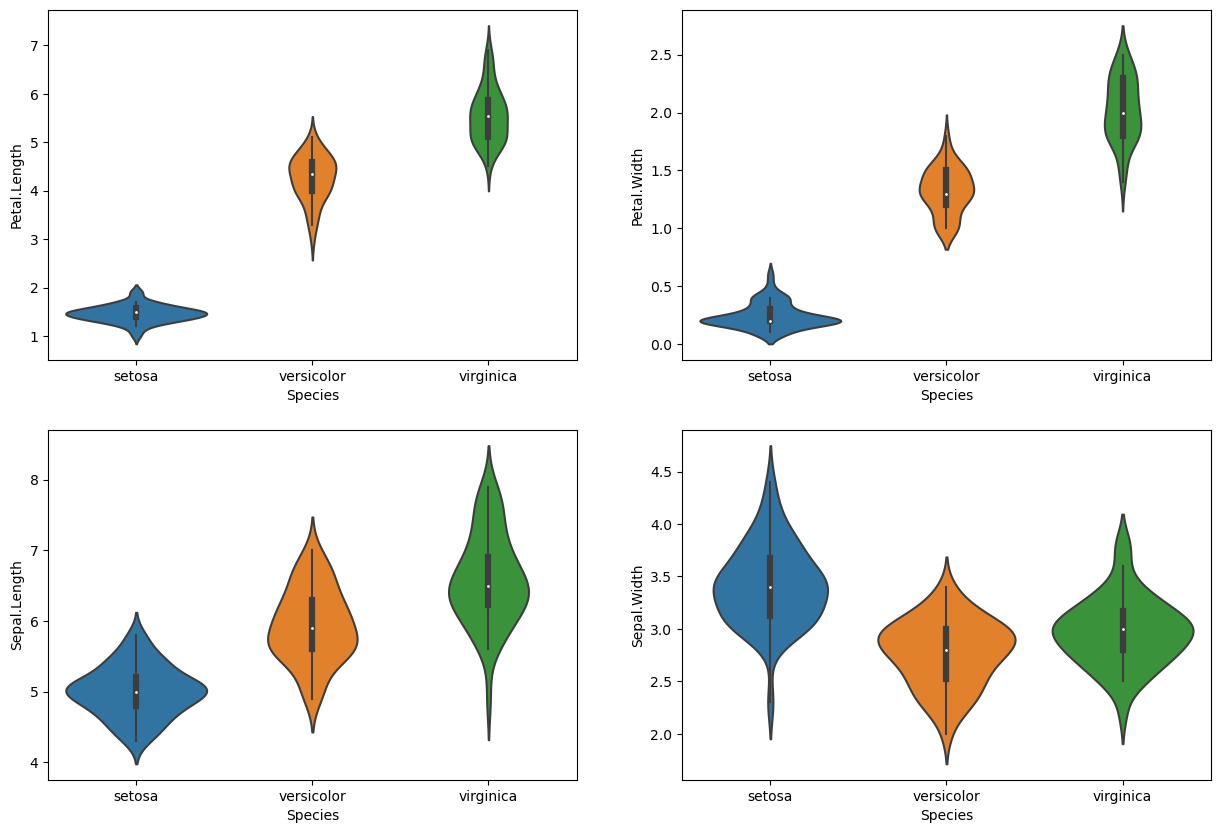

In [19]:
#Violinplot 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='Petal.Length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='Petal.Width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='Sepal.Length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='Sepal.Width',data=iris)

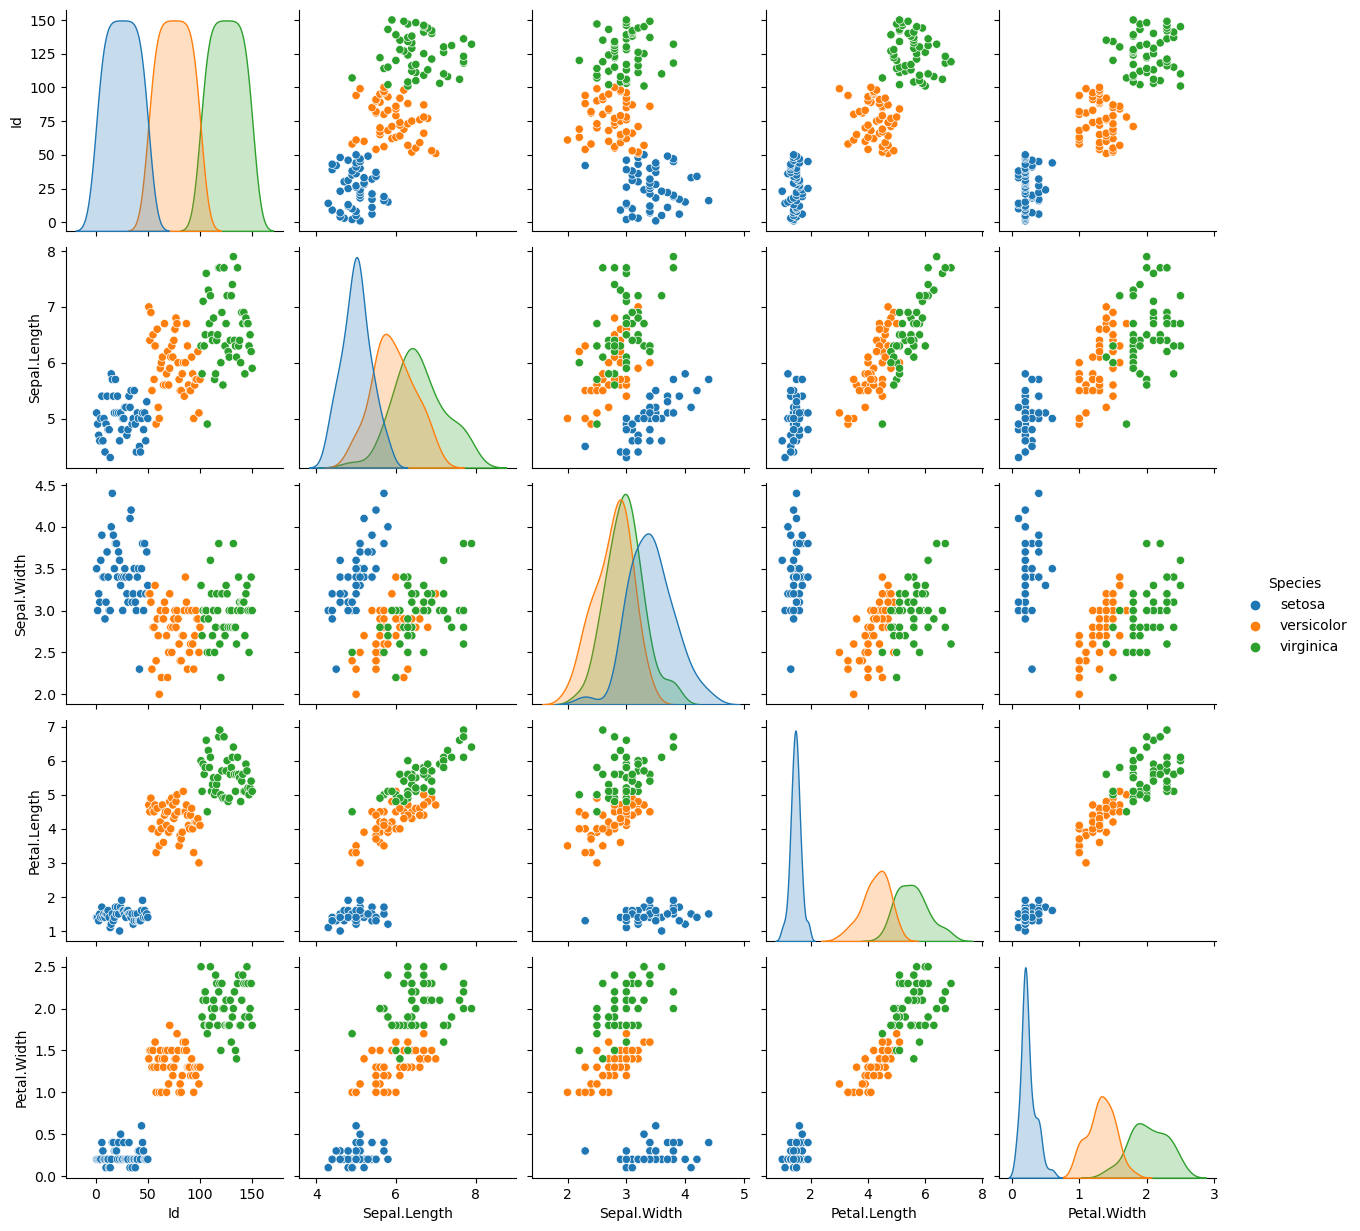

In [20]:
#pairplot
sns.pairplot(iris,hue='Species');

In [21]:
#Heat Maps
numeric_columns = iris.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()


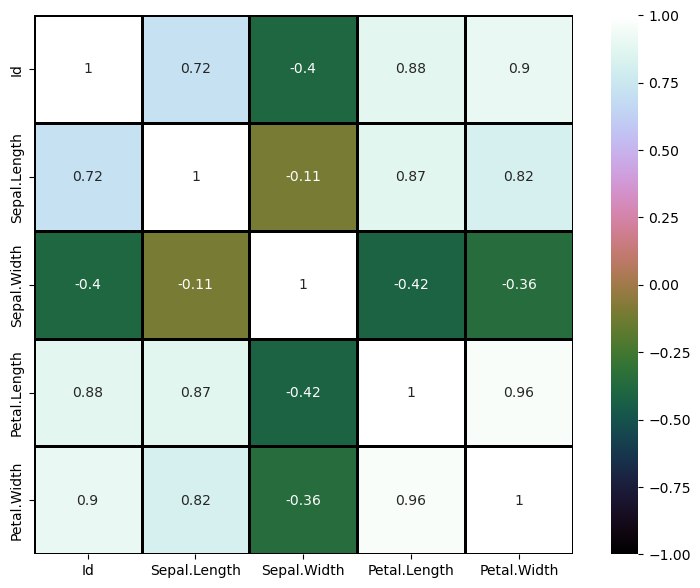

In [22]:
fig = plt.gcf()
fig.set_size_inches(10, 7)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix', linewidths=1, linecolor='k', square=True, mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"}, cbar=True)

In [23]:
X = iris['Sepal.Length'].values.reshape(-1,1)
print(X)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [24]:
Y = iris['Sepal.Width'].values.reshape(-1,1)
print(Y)

[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]
 [3.9]
 [3.4]
 [3.4]
 [2.9]
 [3.1]
 [3.7]
 [3.4]
 [3. ]
 [3. ]
 [4. ]
 [4.4]
 [3.9]
 [3.5]
 [3.8]
 [3.8]
 [3.4]
 [3.7]
 [3.6]
 [3.3]
 [3.4]
 [3. ]
 [3.4]
 [3.5]
 [3.4]
 [3.2]
 [3.1]
 [3.4]
 [4.1]
 [4.2]
 [3.1]
 [3.2]
 [3.5]
 [3.1]
 [3. ]
 [3.4]
 [3.5]
 [2.3]
 [3.2]
 [3.5]
 [3.8]
 [3. ]
 [3.8]
 [3.2]
 [3.7]
 [3.3]
 [3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]
 [2.8]
 [3.3]
 [2.4]
 [2.9]
 [2.7]
 [2. ]
 [3. ]
 [2.2]
 [2.9]
 [2.9]
 [3.1]
 [3. ]
 [2.7]
 [2.2]
 [2.5]
 [3.2]
 [2.8]
 [2.5]
 [2.8]
 [2.9]
 [3. ]
 [2.8]
 [3. ]
 [2.9]
 [2.6]
 [2.4]
 [2.4]
 [2.7]
 [2.7]
 [3. ]
 [3.4]
 [3.1]
 [2.3]
 [3. ]
 [2.5]
 [2.6]
 [3. ]
 [2.6]
 [2.3]
 [2.7]
 [3. ]
 [2.9]
 [2.9]
 [2.5]
 [2.8]
 [3.3]
 [2.7]
 [3. ]
 [2.9]
 [3. ]
 [3. ]
 [2.5]
 [2.9]
 [2.5]
 [3.6]
 [3.2]
 [2.7]
 [3. ]
 [2.5]
 [2.8]
 [3.2]
 [3. ]
 [3.8]
 [2.6]
 [2.2]
 [3.2]
 [2.8]
 [2.8]
 [2.7]
 [3.3]
 [3.2]
 [2.8]
 [3. ]
 [2.8]
 [3. ]
 [2.8]
 [3.8]
 [2.8]
 [2.8]
 [2.6]
 [3. ]
 [3.4]
 [3.1]
 [3. ]
 [3.1]
 [3.1]
 [3.1]
 [2.7]

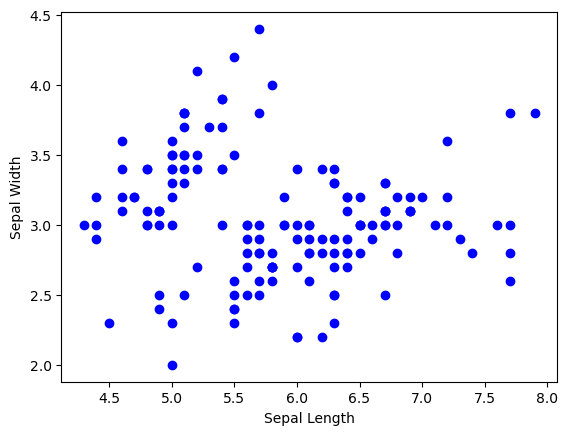

In [25]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='b')
plt.show()

In [26]:
#Correlation
numeric_columns = iris.select_dtypes(include=[np.number])
corr_mat = numeric_columns.corr()

# Print the correlation matrix
print(corr_mat)

                    Id  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Id            1.000000      0.716676    -0.397729      0.882747     0.899759
Sepal.Length  0.716676      1.000000    -0.109369      0.871754     0.817954
Sepal.Width  -0.397729     -0.109369     1.000000     -0.420516    -0.356544
Petal.Length  0.882747      0.871754    -0.420516      1.000000     0.962757
Petal.Width   0.899759      0.817954    -0.356544      0.962757     1.000000


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [28]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

train_X = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
train_y = train.Species

test_X = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
test_y = test.Species

(112, 6)
(38, 6)


In [29]:
train_X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
119,6.0,2.2,5.0,1.5
122,7.7,2.8,6.7,2.0
127,6.1,3.0,4.9,1.8
88,5.6,3.0,4.1,1.3
79,5.7,2.6,3.5,1.0


In [30]:
test_y.head()

49        setosa
93    versicolor
36        setosa
71    versicolor
99    versicolor
Name: Species, dtype: object

In [31]:
#Confusion matrix

model= LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)

from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[12  0  0]
 [ 0 11  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [32]:
# Using Logistic Regression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
score1 = metrics.accuracy_score(prediction, test_y)

# Using Support Vector
model1 = SVC()
model1.fit(train_X, train_y)
pred_y = model1.predict(test_X)
score2 = accuracy_score(test_y, pred_y)

# Using KNN Neighbors
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X, train_y)
y_pred2 = model2.predict(test_X)
score3 = accuracy_score(test_y, y_pred2)

# Using GaussianNB
model3 = GaussianNB()
model3.fit(train_X, train_y)
y_pred3 = model3.predict(test_X)
score4 = accuracy_score(test_y, y_pred3)

# Using Decision Tree
model4 = DecisionTreeClassifier(criterion='entropy', random_state=7)
model4.fit(train_X, train_y)
y_pred4 = model4.predict(test_X)
score5 = accuracy_score(test_y, y_pred4)

# Creating the DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN Neighbors', 'GaussianNB', 'Decision Tree'],
    'Accuracy Score': [score1, score2, score3, score4, score5]
})

# Print the results DataFrame
print(results)


                     Model  Accuracy Score
0      Logistic Regression        0.973684
1  Support Vector Machines        0.973684
2            KNN Neighbors        1.000000
3               GaussianNB        0.973684
4            Decision Tree        0.973684


In [33]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN Neighbors', 'GaussianNB', 'Decision Tree'],
    'Accuracy Score': [score1, score2, score3, score4, score5]
})


In [34]:
result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df = result_df.set_index('Accuracy Score')
result_df.head(9)

,Model
Accuracy Score,
1.000000,KNN Neighbors
0.973684,Logistic Regression
0.973684,Support Vector Machines
0.973684,GaussianNB
0.973684,Decision Tree
